In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
date_today_record = str(datetime.datetime.now()).split(' ')[0].replace('-', '')
date_today_record

'20210518'

In [3]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_25.csv')
commerce_df = pd.read_csv(basedir + 'commerce_25.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [4]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '부동산유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(403271, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식
0,서울특별시 강남구 개포동,1264-3,제2종일반주거지역,8m미만,2006-08-29,29.23,11500.0,393.431406,1300.599641,연립다세대,29.0
1,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2006-12-20,56.10,56500.0,1007.130125,3329.355660,연립다세대,33.0
2,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-01-16,39.60,23300.0,588.383838,1945.070467,연립다세대,33.0
3,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-04-09,39.60,24500.0,618.686869,2045.245770,연립다세대,33.0
4,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2019-10-23,56.10,60000.0,1069.518717,3535.598930,연립다세대,33.0


In [5]:
dandok_filenames = [f for f in os.listdir('./국토교통부_실거래가_공개시스템/단독다가구/매매/') if (f.endswith('.csv'))&('(매매)' in f)]
dandok_filenames

['단독다가구(매매)_실거래가_20060101_20061231.csv',
 '단독다가구(매매)_실거래가_20070101_20071231.csv',
 '단독다가구(매매)_실거래가_20080101_20081231.csv',
 '단독다가구(매매)_실거래가_20090101_20091231.csv',
 '단독다가구(매매)_실거래가_20100101_20101231.csv',
 '단독다가구(매매)_실거래가_20110101_20111231.csv',
 '단독다가구(매매)_실거래가_20120101_20121231.csv',
 '단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210517.csv']

In [6]:
dfs_list = []
for f in dandok_filenames:
    df = pd.read_csv('./국토교통부_실거래가_공개시스템/단독다가구/매매/' + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns:
        df = df[df['해제사유발생일'].isna()]
        df = df.drop(columns=['해제사유발생일'])
    dfs_list.append(df)

In [7]:
dandok_df = pd.concat(dfs_list).reset_index(drop=True)
print(dandok_df.shape)
dandok_df.head()

(195224, 11)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,서울특별시 강남구 개포동,2**,다가구,-,208.09,107.9,200604,17,"34,200",1989.0,NaN
1,서울특별시 강남구 개포동,2**,다가구,-,194.67,117.0,200604,18,"47,900",1993.0,NaN
2,서울특별시 강남구 개포동,2**,다가구,-,299.78,129.9,200601,24,"61,000",1994.0,NaN
3,서울특별시 강남구 개포동,2**,다가구,-,188.89,130.1,200605,16,"52,500",1993.0,NaN
4,서울특별시 강남구 개포동,2**,다가구,-,313.20,134.7,200606,27,"56,000",1992.0,NaN


In [8]:
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['거래금액(만원)'] = dandok_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
dandok_df['대지면적(㎡)'] = dandok_df['대지면적(㎡)'].apply(float)
dandok_df['단가(평)'] = dandok_df['거래금액(만원)'] / dandok_df['대지면적(㎡)'] * 3.305785

In [9]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [10]:
dandok_df['계약날짜'] = dandok_df['계약년월'].apply(lambda x: str(x)[:4]) + '-' +\
dandok_df['계약년월'].apply(lambda x: str(x)[-2:]) + '-' + dandok_df['계약일'].apply(day_modifier)

In [11]:
dandok_df['계약날짜'] = pd.to_datetime(dandok_df['계약날짜'])

In [12]:
dandok_df.drop(columns=['계약년월', '계약일'], inplace=True)

In [13]:
common_df['구'] = common_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
common_df['동'] = common_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])

In [14]:
target_gu = '송파구'
target_dong = '석촌동'
target_purpose = '2종일반'
date_today = pd.to_datetime(datetime.datetime.now())
target_period = 18 # in months

In [15]:
target_df = common_df[
    (common_df['구'] == target_gu)
    &(common_df['동'] == target_dong)
    &(common_df['용도지역'].str.contains(target_purpose))
    &(common_df['계약날짜'] >= (date_today - pd.DateOffset(months=target_period)))
].sort_values(['번지'])
print(target_df.shape)
target_df.head()

(112, 13)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식,구,동
30434,서울특별시 송파구 석촌동,*,제2종일반주거,12m미만,2020-09-22,566.50,860000.0,1518.093557,5018.490909,상업업무,28.0,송파구,석촌동
121226,서울특별시 송파구 석촌동,11-0,제2종일반주거지역,8m미만,2020-02-08,34.60,24000.0,693.641618,2293.030058,연립다세대,29.0,송파구,석촌동
121227,서울특별시 송파구 석촌동,11-0,제2종일반주거지역,8m미만,2020-07-13,34.60,29000.0,838.150289,2770.744653,연립다세대,29.0,송파구,석촌동
121463,서울특별시 송파구 석촌동,12-8,제2종일반주거지역,8m미만,2020-02-25,33.05,35000.0,1059.001513,3500.831316,연립다세대,30.0,송파구,석촌동
121464,서울특별시 송파구 석촌동,12-8,제2종일반주거지역,8m미만,2020-10-09,23.09,28200.0,1221.307926,4037.381421,연립다세대,30.0,송파구,석촌동


In [16]:
dandok_target_df = dandok_df[
    (dandok_df['구'] == target_gu)
    &(dandok_df['동'] == target_dong)
    &(dandok_df['계약날짜'] >= (date_today - pd.DateOffset(months=target_period)))
].sort_values(['번지'], ascending=False)
print(dandok_target_df.shape)
dandok_target_df.head()

(28, 13)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,도로명,구,동,단가(평),계약날짜
188560,서울특별시 송파구 석촌동,5*,다가구,8m미만,509.18,227.8,255000,1996.0,석촌호수로18길,송파구,석촌동,3700.505597,2020-05-22
188558,서울특별시 송파구 석촌동,2**,다가구,12m미만,530.84,204.0,225000,1988.0,가락로5길,송파구,석촌동,3646.086397,2020-05-21
188570,서울특별시 송파구 석촌동,2**,단독,8m미만,247.22,174.4,175000,1989.0,가락로5길,송파구,석촌동,3317.158114,2020-09-18
194161,서울특별시 송파구 석촌동,2**,단독,8m미만,246.24,169.8,232000,1990.0,가락로5길,송파구,석촌동,4516.738045,2021-04-29
194160,서울특별시 송파구 석촌동,2**,단독,8m미만,246.22,169.8,178000,1990.0,가락로5길,송파구,석촌동,3465.428327,2021-04-02


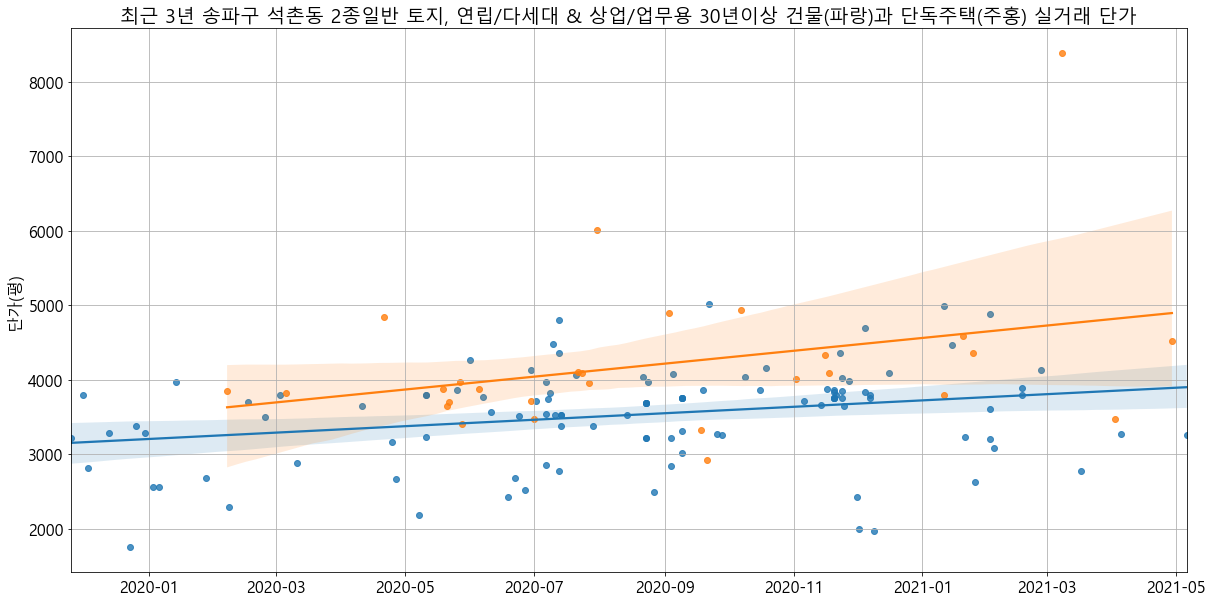

In [17]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
plt.title('최근 3년 {} {} {} 토지, 연립/다세대 & 상업/업무용 30년이상 건물(파랑)과 단독주택(주홍) 실거래 단가'.format(target_gu, target_dong, target_purpose))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])#, order=3, ci=None)
ax.xaxis.update_units(dandok_target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(dandok_target_df['계약날짜']), y=dandok_target_df['단가(평)'])#, order=3, ci=None)
#plt.ylim([0, 6000])
plt.savefig(basedir + '{}_{}_{}_{}/산포도.png'.format(target_gu, target_dong, target_purpose, date_today_record))

In [18]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)
target_df.to_excel(basedir + '{}_{}_{}_{}/실거래가.xlsx'.format(target_gu, target_dong, target_purpose, date_today_record), index=False)